In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import os 

import pandas as pd
# use TeX
plt.rc('text', usetex=True)

### Steps

* Make a circle of radius 1, centered at $-(1+\delta), 0$ and radius 1. 
* This circle starts at $\pi$ and ends at $\phi_{c1}$, where $\phi_{c1}$ is
$$ \phi_{c1} = \sin^{-1}\left(2\delta\right) $$

* The fillet circle starts at $\phi_{c1}$. The center of this circle lies on the intersection $x = 0$ and $y = tan(\phi_{c1})(x+(1+\delta))$ (line joining the center of circle 1 to the point where it ends). This gives: 
$$Y_{f,c} = (1+\delta)\tan\left(\phi_{c1}\right) $$
* The radius of this fillet circle is $R_{f} = \frac{1+\delta}{cos(\phi_{c1})} - 1$.
* For the end point of this circle, we ensure that it can connect seemlessly to the next circle. This gives us the angle $\theta$ as
$$\theta = \sin^{-1}\left(\frac{Y_{f,c}}{R_r+R_f}\right)$$ 

* Fillet circle ends at $-\left(\pi/2-\theta\right)$

* Now, we make a circle of radius $R_r$. This circle has a center at $(X_{2c}, 0)$

$$X_{2c} = \left(R_f+R_r\right)\cos(\theta)$$


* This second circle starts at $\pi - \theta$ and ends at $0$.

A schematic of the process is given in [Initial condition unequal sized drops_bubbles.pdf](Initial%20condition%20unequal%20sized%20drops_bubbles.pdf)


### Test

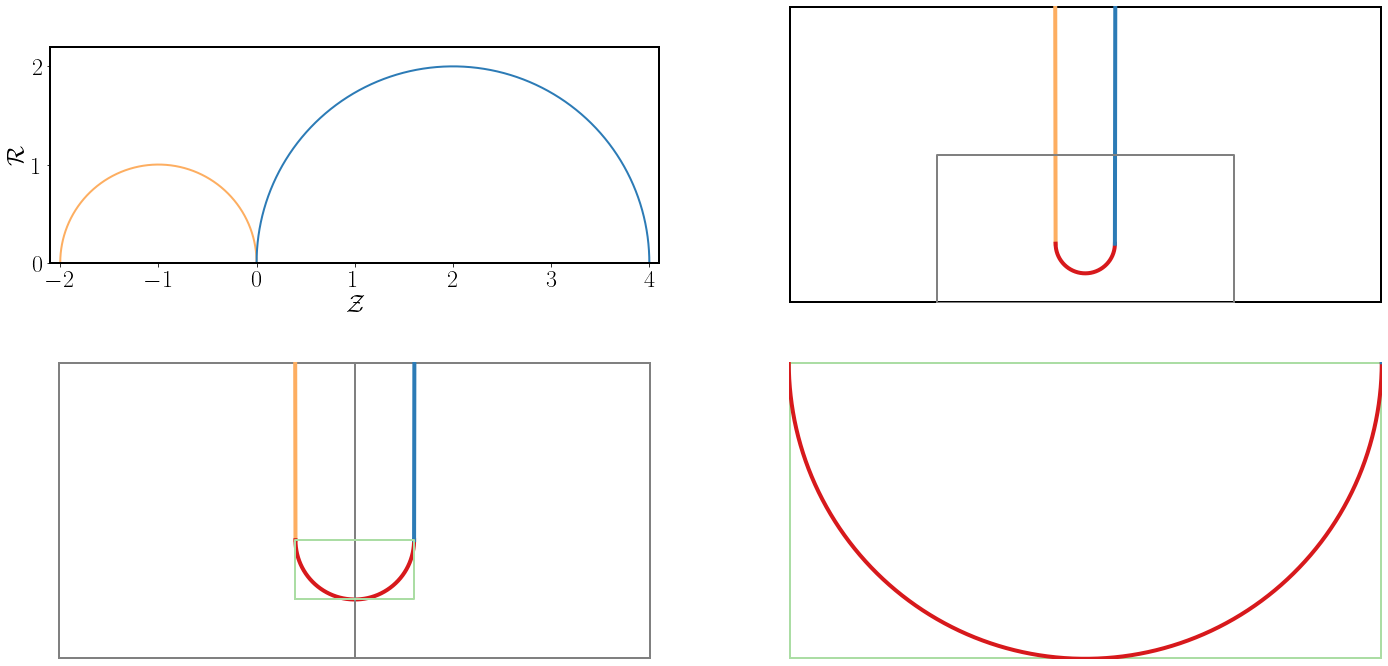

In [2]:
delta, Rr = 1e-6, 2

X1c = -(1+delta)
# X2c = (delta+Rr)

# phic is the angle where y coordinate is $2\delta$
phic1 = np.arcsin(2*delta)
phi1 = np.linspace(np.pi, phic1, int(1e3))
X1 = X1c+np.cos(phi1)
Y1 = np.sin(phi1)

# fillet circle
Yfc = (1+delta)*np.tan(phic1)
Rf = (1+delta)/np.cos(phic1) - 1

phifStart = np.pi/2-phic1
theta = np.arcsin(Yfc/(Rf+Rr))
phifEnd = np.pi/2-theta

phif = np.linspace(phifStart, -phifEnd, int(1e3))
Xf = -Rf*np.sin(phif)
Yf = Yfc-Rf*np.cos(phif)

phic2 = np.pi - theta
X2c = (Rf+Rr)*np.cos(theta)

phi2 = np.linspace(phic2, 0, int(1e3))
X2 = X2c+Rr*np.cos(phi2)
Y2 = Rr*np.sin(phi2)

# plot this circle
plt.close()
fig, axs = plt.subplots(2, 2, figsize=(24,12))
ax1, ax2, ax3, ax4 = axs.flatten()
NWidth = 10
xWindow1, xWindow2, yWindow1, YWindow2 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
NWidth = 5
xWindow3, xWindow4, yWindow3, YWindow4 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
NWidth = 1
xWindow5, xWindow6, yWindow5, YWindow6 = -NWidth*delta, NWidth*delta, delta, NWidth*delta+delta

ax1.plot(X1, Y1, '-', lw=2, color='#fdae61')
ax1.plot(Xf, Yf, '-', lw=2, color='#d7191c')
ax1.plot(X2, Y2, '-', lw=2, color='#2c7bb6')

ax1.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=2)
ax1.axis('square')
ax1.set_xlim(-(delta+2)-0.1, delta+2*Rr+0.1)
ax1.set_ylim(0, 1.1*Rr)
ax1.set_xlabel('$\mathcal{Z}$', fontsize=24)
ax1.set_ylabel('$\mathcal{R}$', fontsize=24)
ax1.tick_params(axis='both', which='major', labelsize=24)
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

ax2.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=4)
ax2.plot(X1, Y1, '-', lw=4, color='#fdae61')
ax2.plot(Xf, Yf, '-', lw=4, color='#d7191c')
ax2.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

ax2.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=2, color='gray')
ax2.axis('square')
ax2.set_xlim(xWindow1, xWindow2)
ax2.set_ylim(yWindow1, YWindow2)
ax2.axis('off')

ax3.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=4, color='gray')
ax3.plot(X1, Y1, '-', lw=4, color='#fdae61')
ax3.plot(Xf, Yf, '-', lw=4, color='#d7191c')
ax3.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

ax3.plot([0, 0], [0, YWindow4], '-', lw=2, color='gray')
ax3.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=2, color='#abdda4')
ax3.axis('square')
ax3.set_xlim(xWindow3, xWindow4)
ax3.set_ylim(yWindow3, YWindow4)
ax3.axis('off')

ax4.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=4, color='#abdda4')
ax4.plot(X1, Y1, '-', lw=4, color='#fdae61')
ax4.plot(Xf, Yf, '-', lw=4, color='#d7191c')
ax4.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

ax4.axis('square')
ax4.set_xlim(xWindow5, xWindow6)
ax4.set_ylim(yWindow5, YWindow6)
ax4.axis('off')
plt.savefig('Test.pdf', bbox_inches='tight')
plt.show()


### Function to generate the three circles

In [2]:
def GetCircles(delta, Rr):
  X1c = -(1+delta)
    
  # phic is the angle where y coordinate is $2\delta$
  phic1 = np.arcsin(2*delta)
  phi1 = np.linspace(np.pi, phic1, int(1e3))
  X1 = X1c+np.cos(phi1)
  Y1 = np.sin(phi1)

  # fillet circle
  Yfc = (1+delta)*np.tan(phic1)
  Rf = (1+delta)/np.cos(phic1) - 1

  phifStart = np.pi/2-phic1
  theta = np.arcsin(Yfc/(Rf+Rr))
  phifEnd = np.pi/2-theta

  phif = np.linspace(phifStart, -phifEnd, int(1e3))
  Xf = -Rf*np.sin(phif)
  Yf = Yfc-Rf*np.cos(phif)

  phic2 = np.pi - theta
  X2c = (Rf+Rr)*np.cos(theta)

  phi2 = np.linspace(phic2, 0, int(1e3))
  X2 = X2c+Rr*np.cos(phi2)
  Y2 = Rr*np.sin(phi2)

  X, Y = X1, Y1
  X = np.append(X, Xf)
  Y = np.append(Y, Yf)
  X = np.append(X, X2)
  Y = np.append(Y, Y2)

  Interface = pd.DataFrame({'x': X, 'y': Y})
  

  return Interface, X1, Y1, Xf, Yf, X2, Y2

### Function to run Basilisk to check the initial condition

In [3]:
def gettingFacets(L0):
    import subprocess as sp
    exe = ["./InitialCondition", str(L0)]
    p = sp.Popen(exe, stdout=sp.PIPE, stderr=sp.PIPE)
    stdout, stderr = p.communicate()
    temp1 = stderr.decode("utf-8")
    temp2 = temp1.split("\n")
    segs = []
    skip = False
    if (len(temp2) > 1e2):
        for n1 in range(len(temp2)):
            temp3 = temp2[n1].split(" ")
            if temp3 == ['']:
                skip = False
                pass
            else:
                if not skip:
                    temp4 = temp2[n1+1].split(" ")
                    r1, z1 = np.array([float(temp3[1]), float(temp3[0])])
                    r2, z2 = np.array([float(temp4[1]), float(temp4[0])])
                    segs.append(((z1, r1),(z2,r2)))
                    skip = True
    return segs

### Function to visualize the initial condition without Basilisk

In [4]:
def PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT):
  plt.close()
  fig, axs = plt.subplots(2, 2, figsize=(24,12))
  ax1, ax2, ax3, ax4 = axs.flatten()
  NWidth = 10
  xWindow1, xWindow2, yWindow1, YWindow2 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
  NWidth = 5
  xWindow3, xWindow4, yWindow3, YWindow4 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
  NWidth = 1
  xWindow5, xWindow6, yWindow5, YWindow6 = -NWidth*delta, NWidth*delta, delta, NWidth*delta+delta

  # ax1.plot(Interface['x'], Interface['y'], 'k-', lw=4)
  ax1.plot(X1, Y1, '-', lw=2, color='#fdae61')
  ax1.plot(Xf, Yf, '-', lw=2, color='#d7191c')
  ax1.plot(X2, Y2, '-', lw=2, color='#2c7bb6')

  ax1.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=2)
  ax1.axis('square')
  ax1.set_xlim(-(delta+2)-0.1, delta+2*Rr+0.1)
  ax1.set_ylim(0, 1.1*Rr)
  ax1.set_xlabel('$\mathcal{Z}$', fontsize=24)
  ax1.set_ylabel('$\mathcal{R}$', fontsize=24)
  ax1.tick_params(axis='both', which='major', labelsize=24)
  for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)

  ax2.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=4)
  ax2.plot(X1, Y1, '-', lw=4, color='#fdae61')
  ax2.plot(Xf, Yf, '-', lw=4, color='#d7191c')
  ax2.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

  ax2.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=2, color='gray')
  ax2.axis('square')
  ax2.set_xlim(xWindow1, xWindow2)
  ax2.set_ylim(yWindow1, YWindow2)
  ax2.axis('off')

  ax3.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=4, color='gray')
  ax3.plot(X1, Y1, '-', lw=4, color='#fdae61')
  ax3.plot(Xf, Yf, '-', lw=4, color='#d7191c')
  ax3.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

  ax3.plot([0, 0], [0, YWindow4], '-', lw=2, color='gray')
  ax3.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=2, color='#abdda4')
  ax3.axis('square')
  ax3.set_xlim(xWindow3, xWindow4)
  ax3.set_ylim(yWindow3, YWindow4)
  ax3.axis('off')

  ax4.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=4, color='#abdda4')
  ax4.plot(X1, Y1, '-', lw=4, color='#fdae61')
  ax4.plot(Xf, Yf, '-', lw=4, color='#d7191c')
  ax4.plot(X2, Y2, '-', lw=4, color='#2c7bb6')

  ax4.axis('square')
  ax4.set_xlim(xWindow5, xWindow6)
  ax4.set_ylim(yWindow5, YWindow6)
  ax4.axis('off')
  plt.savefig(ImageName, bbox_inches='tight')
  if PLOT:
    plt.show()
  else:
    plt.close()

### Function to visualize the initial condition with Basilisk

In [5]:
def PlotInterfacesBas(Interface, InterfaceBas, delta, ImageName, PLOT):
  plt.close()
  fig, axs = plt.subplots(2, 2, figsize=(24,12))
  ax1, ax2, ax3, ax4 = axs.flatten()
  NWidth = 10
  xWindow1, xWindow2, yWindow1, YWindow2 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
  NWidth = 5
  xWindow3, xWindow4, yWindow3, YWindow4 = -NWidth*delta, NWidth*delta, 0, NWidth*delta
  NWidth = 1
  xWindow5, xWindow6, yWindow5, YWindow6 = -NWidth*delta, NWidth*delta, delta, NWidth*delta+delta

  ax1.plot(Interface['x'], Interface['y'], '-', lw=4, color='#fdae61')
  line_segments = LineCollection(InterfaceBas, linewidths=4, colors='#1a9641', linestyle='solid')
  ax1.add_collection(line_segments)

  ax1.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=2)
  ax1.axis('square')
  ax1.set_xlim(-(delta+2)-0.1, delta+2*Rr+0.1)
  ax1.set_ylim(0, 1.1*Rr)
  ax1.set_xlabel('$\mathcal{Z}$', fontsize=24)
  ax1.set_ylabel('$\mathcal{R}$', fontsize=24)
  ax1.tick_params(axis='both', which='major', labelsize=24)
  for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)

  ax2.plot([xWindow1, xWindow2, xWindow2, xWindow1, xWindow1], [yWindow1, yWindow1, YWindow2, YWindow2, yWindow1], 'k-', lw=4)

  ax2.plot(Interface['x'], Interface['y'], '-', lw=4, color='#fdae61')
  line_segments = LineCollection(InterfaceBas, linewidths=4, colors='#1a9641', linestyle='solid')
  ax2.add_collection(line_segments)

  ax2.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=2, color='gray')
  ax2.axis('square')
  ax2.set_xlim(xWindow1, xWindow2)
  ax2.set_ylim(yWindow1, YWindow2)
  ax2.axis('off')

  ax3.plot([xWindow3, xWindow4, xWindow4, xWindow3, xWindow3], [yWindow3, yWindow3, YWindow4, YWindow4, yWindow3], '-', lw=4, color='gray')
  ax3.plot(Interface['x'], Interface['y'], '-', lw=4, color='#fdae61')
  line_segments = LineCollection(InterfaceBas, linewidths=4, colors='#1a9641', linestyle='solid')
  ax3.add_collection(line_segments)

  ax3.plot([0, 0], [0, YWindow4], '-', lw=2, color='gray')
  ax3.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=2, color='#abdda4')
  ax3.axis('square')
  ax3.set_xlim(xWindow3, xWindow4)
  ax3.set_ylim(yWindow3, YWindow4)
  ax3.axis('off')

  ax4.plot([xWindow5, xWindow6, xWindow6, xWindow5, xWindow5], [yWindow5, yWindow5, YWindow6, YWindow6, yWindow5], '-', lw=4, color='#abdda4')
  ax4.plot(Interface['x'], Interface['y'], '-', lw=4, color='#fdae61')
  line_segments = LineCollection(InterfaceBas, linewidths=4, colors='#1a9641', linestyle='solid')
  ax4.add_collection(line_segments)

  ax4.axis('square')
  ax4.set_xlim(xWindow5, xWindow6)
  ax4.set_ylim(yWindow5, YWindow6)
  ax4.axis('off')
  plt.savefig(ImageName, bbox_inches='tight')

  if PLOT:
    plt.show()
  else:
    plt.close()

### Main code

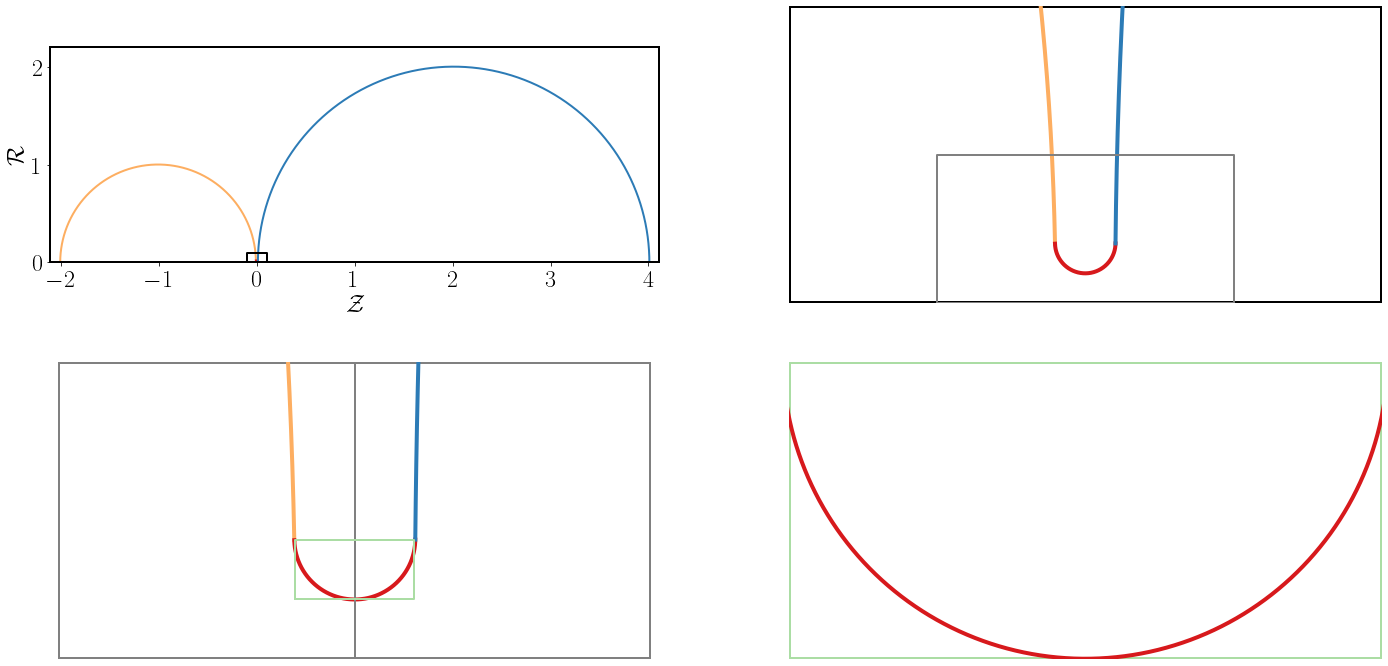

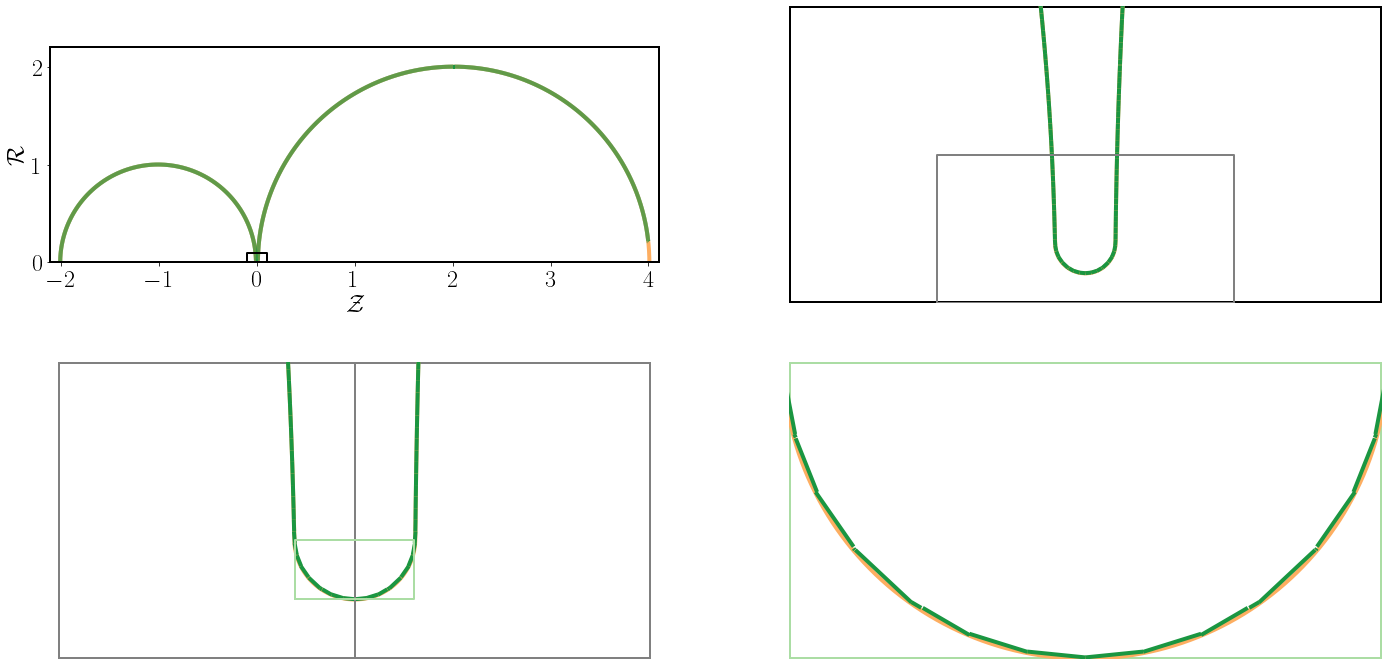

In [10]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.
delta, Rr = 1e-2, 2

Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

# Plot the two circles in raw form
PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, 'TestWithBasiliskWithoutBasilisk.pdf', PLOT=True)

# Save Interface in a data file withouth header
Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
# print(Interface.head())

# get facets from Basilisk
facets = gettingFacets(8)

# compare the two interfaces -> from Basilisk and raw!
PlotInterfacesBas(Interface, facets, delta, 'TestWithBasilisk.pdf', PLOT=True)

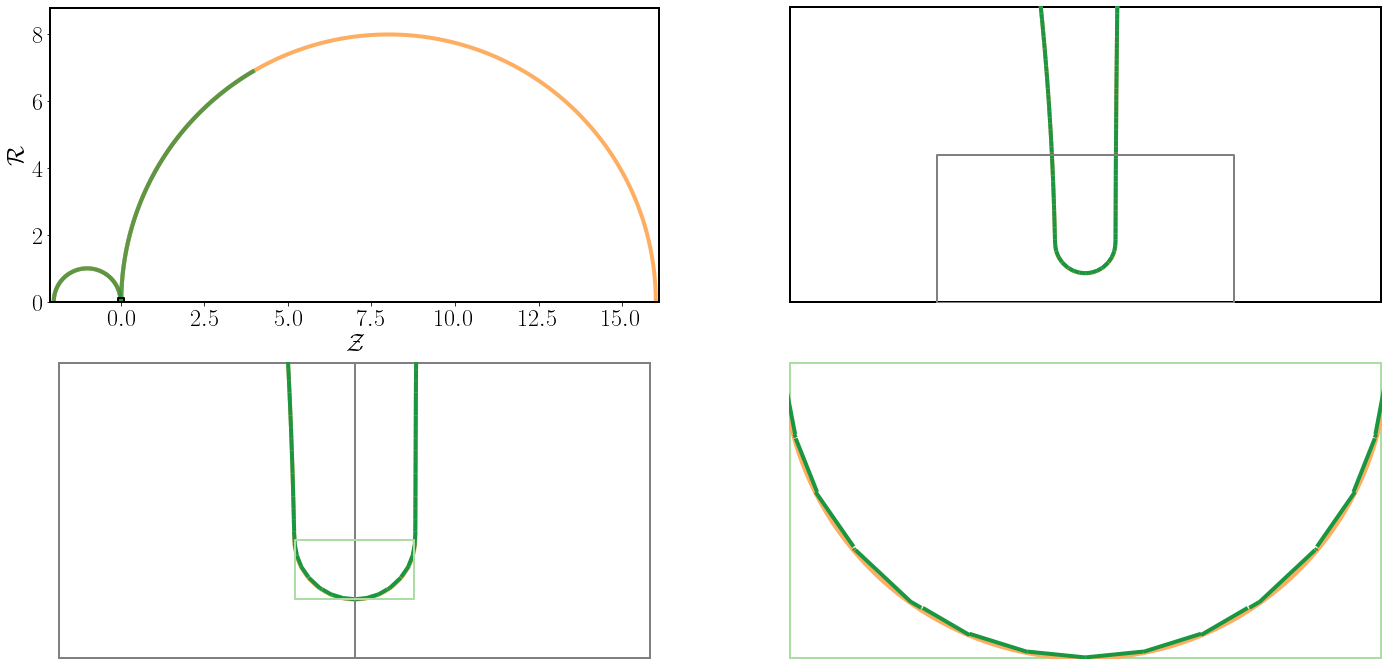

In [11]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.

Rratio = [1, 2, 4, 8]

for Rr in Rratio:
  delta = 1e-2

  Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

  # Plot the two circles in raw form
  ImageName = 'ImageFiles_delta1e-2/TestWithBasiliskWithoutBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT=False)

  # Save Interface in a data file withouth header
  Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
  FileName = 'DataFiles_delta1e-2/InitialCondition'+str(Rr)+'.dat'
  Interface.to_csv(FileName, index=False, header=False, sep=' ')
  # print(Interface.head())

  # get facets from Basilisk
  facets = gettingFacets(8)

  # compare the two interfaces -> from Basilisk and raw!
  ImageName = 'ImageFiles_delta1e-2/TestWithBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=False)

In [9]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.

Rratio = [1, 2, 4, 8]

for Rr in Rratio:
  delta = 1e-1
  

  Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

  # Plot the two circles in raw form
  ImageName = 'ImageFiles_delta1e-1/TestWithBasiliskWithoutBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT=False)

  # Save Interface in a data file withouth header
  Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
  FileName = 'DataFiles_delta1e-1/InitialCondition'+str(Rr)+'.dat'
  Interface.to_csv(FileName, index=False, header=False, sep=' ')
  # print(Interface.head())

  # get facets from Basilisk
  facets = gettingFacets(8)

  # compare the two interfaces -> from Basilisk and raw!
  ImageName = 'ImageFiles_delta1e-1/TestWithBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=False)

In [7]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.

Rratio = [1, 2, 4, 8]
ImageFolder='ImageFiles_delta5e-2'
DataFolder='DataFiles_delta5e-2'

# if ImageFolder is not present, create it
if not os.path.exists(ImageFolder):
  os.makedirs(ImageFolder)
# if DataFolder is not present, create it
if not os.path.exists(DataFolder):
  os.makedirs(DataFolder)


for Rr in Rratio:
  delta = 5e-2
  

  Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

  # Plot the two circles in raw form
  ImageName = str(ImageFolder)+'/TestWithBasiliskWithoutBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT=False)

  # Save Interface in a data file withouth header
  Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
  FileName = str(DataFolder)+'/InitialConditionRr-'+str(Rr)+'delta-'+str(delta)+'.dat'
  Interface.to_csv(FileName, index=False, header=False, sep=' ')
  # print(Interface.head())

  # get facets from Basilisk
  facets = gettingFacets(8)

  # compare the two interfaces -> from Basilisk and raw!
  ImageName = str(ImageFolder)+'/TestWithBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=False)

In [8]:
print(str(delta))

0.05


In [7]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.

Rratio = [1, 2, 4, 8]
ImageFolder='ImageFiles_delta1e-2'
DataFolder='DataFiles_delta1e-2'

# if ImageFolder is not present, create it
if not os.path.exists(ImageFolder):
  os.makedirs(ImageFolder)
# if DataFolder is not present, create it
if not os.path.exists(DataFolder):
  os.makedirs(DataFolder)


for Rr in Rratio:
  delta = 1e-2
  

  Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

  # Plot the two circles in raw form
  ImageName = str(ImageFolder)+'/TestWithBasiliskWithoutBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT=False)

  # Save Interface in a data file withouth header
  Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
  FileName = str(DataFolder)+'/InitialConditionRr-'+str(Rr)+'delta-'+str(delta)+'.dat'
  Interface.to_csv(FileName, index=False, header=False, sep=' ')
  # print(Interface.head())

  # get facets from Basilisk
  facets = gettingFacets(8)

  # compare the two interfaces -> from Basilisk and raw!
  ImageName = str(ImageFolder)+'/TestWithBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=False)

In [6]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.

delta = 1e-2
Rratio = [1, 1.05, 1.25, 1.5,  2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 7.5, 8.0, 9.0, 10.0]
ImageFolder='ImageFiles_delta1e-2'
DataFolder='DataFiles_delta1e-2'

# if ImageFolder is not present, create it
if not os.path.exists(ImageFolder):
  os.makedirs(ImageFolder)
# if DataFolder is not present, create it
if not os.path.exists(DataFolder):
  os.makedirs(DataFolder)


for Rr in Rratio:

  print("Doing Rr = ", Rr, " delta = ", delta, "\n")

  Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

  # Plot the two circles in raw form
  ImageName = str(ImageFolder)+'/TestWithBasiliskWithoutBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT=False)

  # Save Interface in a data file withouth header
  Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
  
  FileDat = "InitialConditionRr-%3.2fdelta-%3.2f.dat" % (Rr, delta)
  FileName = str(DataFolder)+'/'+FileDat

  Interface.to_csv(FileName, index=False, header=False, sep=' ')
  # print(Interface.head())

  # get facets from Basilisk
  facets = gettingFacets(8)

  # compare the two interfaces -> from Basilisk and raw!
  ImageName = str(ImageFolder)+'/TestWithBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=False)

Doing Rr =  1  delta =  0.01 

Doing Rr =  1.05  delta =  0.01 

Doing Rr =  1.25  delta =  0.01 

Doing Rr =  1.5  delta =  0.01 

Doing Rr =  2.0  delta =  0.01 

Doing Rr =  2.5  delta =  0.01 

Doing Rr =  3.0  delta =  0.01 

Doing Rr =  3.5  delta =  0.01 

Doing Rr =  4.0  delta =  0.01 

Doing Rr =  5.0  delta =  0.01 

Doing Rr =  6.0  delta =  0.01 

Doing Rr =  7.0  delta =  0.01 

Doing Rr =  7.5  delta =  0.01 

Doing Rr =  8.0  delta =  0.01 

Doing Rr =  9.0  delta =  0.01 

Doing Rr =  10.0  delta =  0.01 



In [6]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.

delta = 1e-2
Rratio = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.75, 1.8, 2.0, 2.1, 2.2, 2.25, 2.3, 2.4]
ImageFolder='ImageFiles_delta1e-2'
DataFolder='DataFiles_delta1e-2'

# if ImageFolder is not present, create it
if not os.path.exists(ImageFolder):
  os.makedirs(ImageFolder)
# if DataFolder is not present, create it
if not os.path.exists(DataFolder):
  os.makedirs(DataFolder)


for Rr in Rratio:

  print("Doing Rr = ", Rr, " delta = ", delta, "\n")

  Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

  # Plot the two circles in raw form
  ImageName = str(ImageFolder)+'/TestWithBasiliskWithoutBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT=False)

  # Save Interface in a data file withouth header
  Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
  
  FileDat = "InitialConditionRr-%3.2fdelta-%3.2f.dat" % (Rr, delta)
  FileName = str(DataFolder)+'/'+FileDat

  Interface.to_csv(FileName, index=False, header=False, sep=' ')
  # print(Interface.head())

  # get facets from Basilisk
  facets = gettingFacets(8)

  # compare the two interfaces -> from Basilisk and raw!
  ImageName = str(ImageFolder)+'/TestWithBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=False)

Doing Rr =  1.1  delta =  0.01 

Doing Rr =  1.2  delta =  0.01 

Doing Rr =  1.3  delta =  0.01 

Doing Rr =  1.4  delta =  0.01 

Doing Rr =  1.5  delta =  0.01 

Doing Rr =  1.6  delta =  0.01 

Doing Rr =  1.7  delta =  0.01 

Doing Rr =  1.75  delta =  0.01 

Doing Rr =  1.8  delta =  0.01 

Doing Rr =  2.0  delta =  0.01 

Doing Rr =  2.1  delta =  0.01 

Doing Rr =  2.2  delta =  0.01 

Doing Rr =  2.25  delta =  0.01 

Doing Rr =  2.3  delta =  0.01 

Doing Rr =  2.4  delta =  0.01 



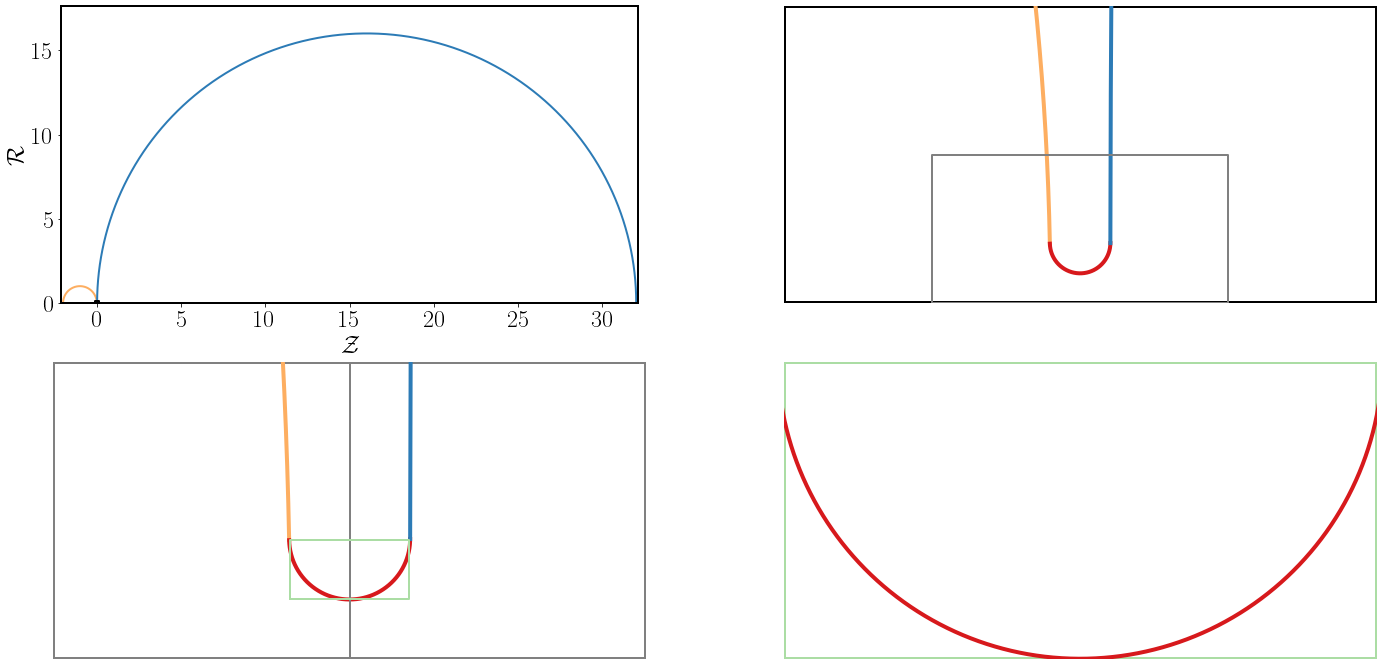

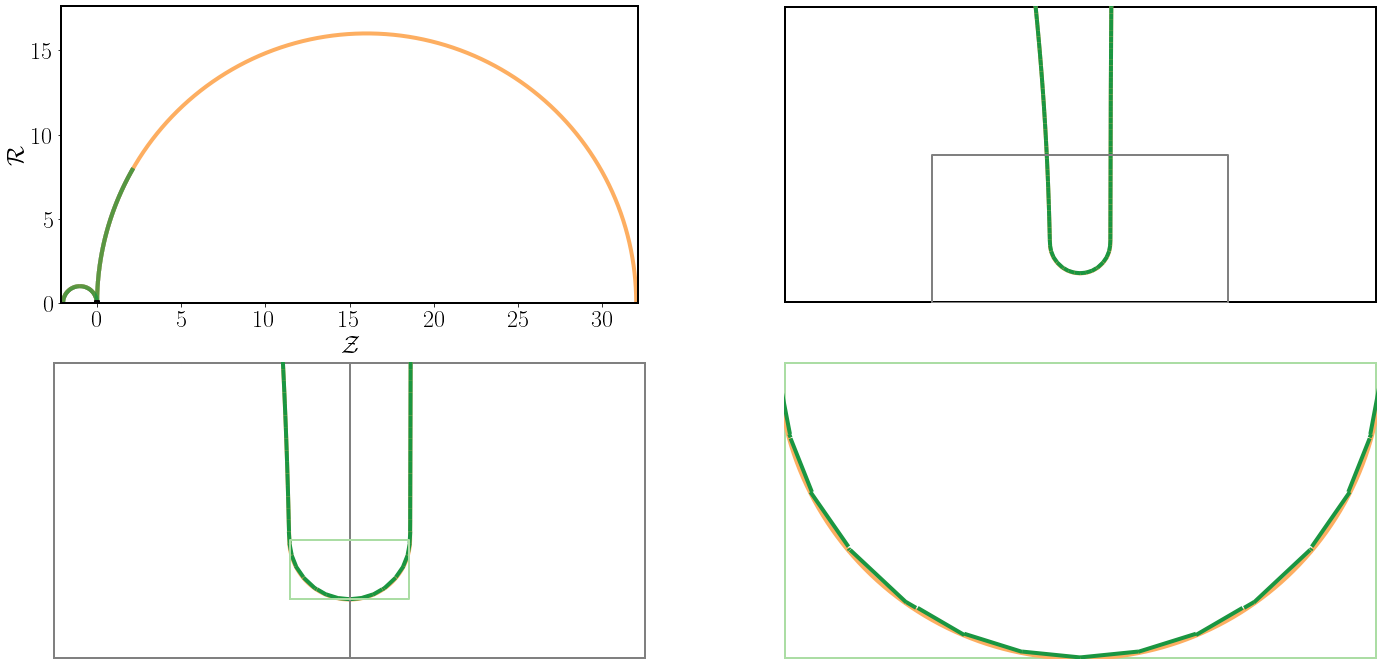

In [6]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.
delta, Rr = 1e-2, 16

Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

# Plot the two circles in raw form
PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, 'TestWithBasiliskWithoutBasilisk.pdf', PLOT=True)

# Save Interface in a data file withouth header
Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
# print(Interface.head())

# get facets from Basilisk
facets = gettingFacets(8)

# compare the two interfaces -> from Basilisk and raw!
PlotInterfacesBas(Interface, facets, delta, 'TestWithBasilisk.pdf', PLOT=True)

Doing Rr =  16  delta =  0.01 



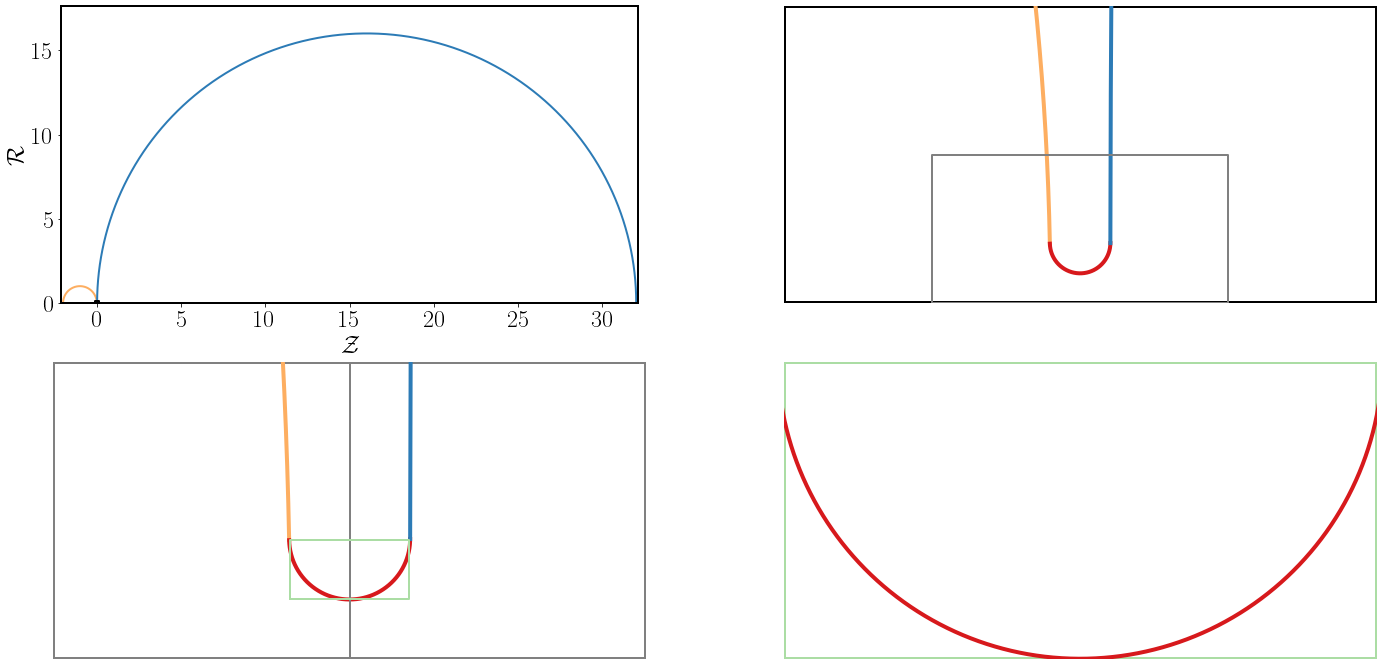

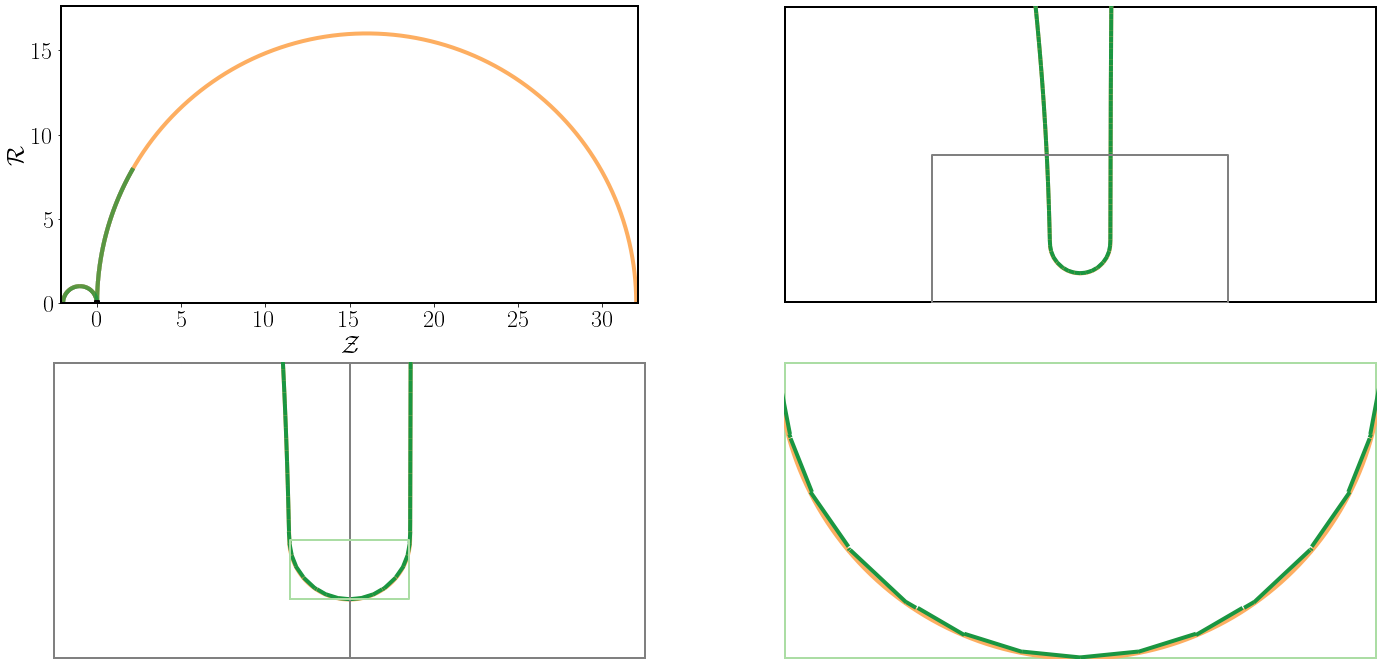

In [7]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.

delta = 1e-2
Rratio = [16]
ImageFolder='ImageFiles_delta1e-2'
DataFolder='DataFiles_delta1e-2'

# if ImageFolder is not present, create it
if not os.path.exists(ImageFolder):
  os.makedirs(ImageFolder)
# if DataFolder is not present, create it
if not os.path.exists(DataFolder):
  os.makedirs(DataFolder)


for Rr in Rratio:

  print("Doing Rr = ", Rr, " delta = ", delta, "\n")

  Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

  # Plot the two circles in raw form
  ImageName = str(ImageFolder)+'/TestWithBasiliskWithoutBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT=True)

  # Save Interface in a data file withouth header
  Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
  
  FileDat = "InitialConditionRr-%3.2fdelta-%3.2f.dat" % (Rr, delta)
  FileName = str(DataFolder)+'/'+FileDat

  Interface.to_csv(FileName, index=False, header=False, sep=' ')
  # print(Interface.head())

  # get facets from Basilisk
  facets = gettingFacets(8)

  # compare the two interfaces -> from Basilisk and raw!
  ImageName = str(ImageFolder)+'/TestWithBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=True)

Doing Rr =  1  delta =  0.001 



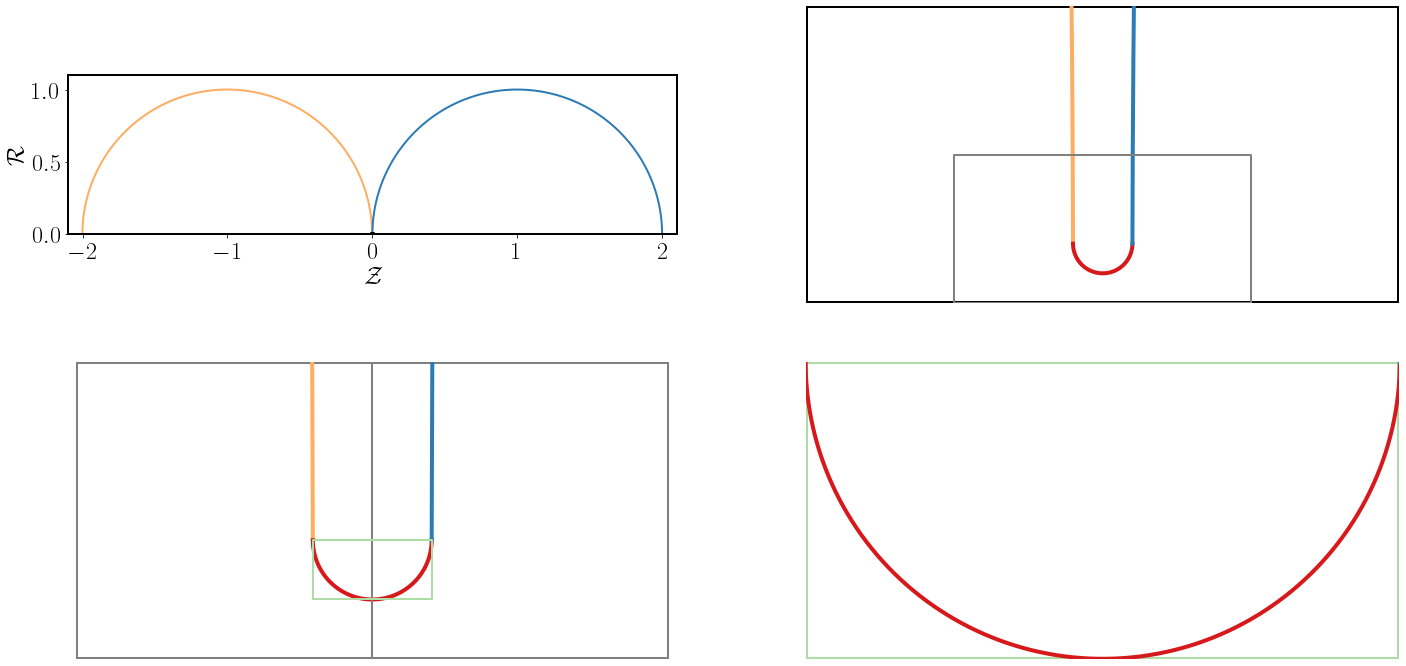

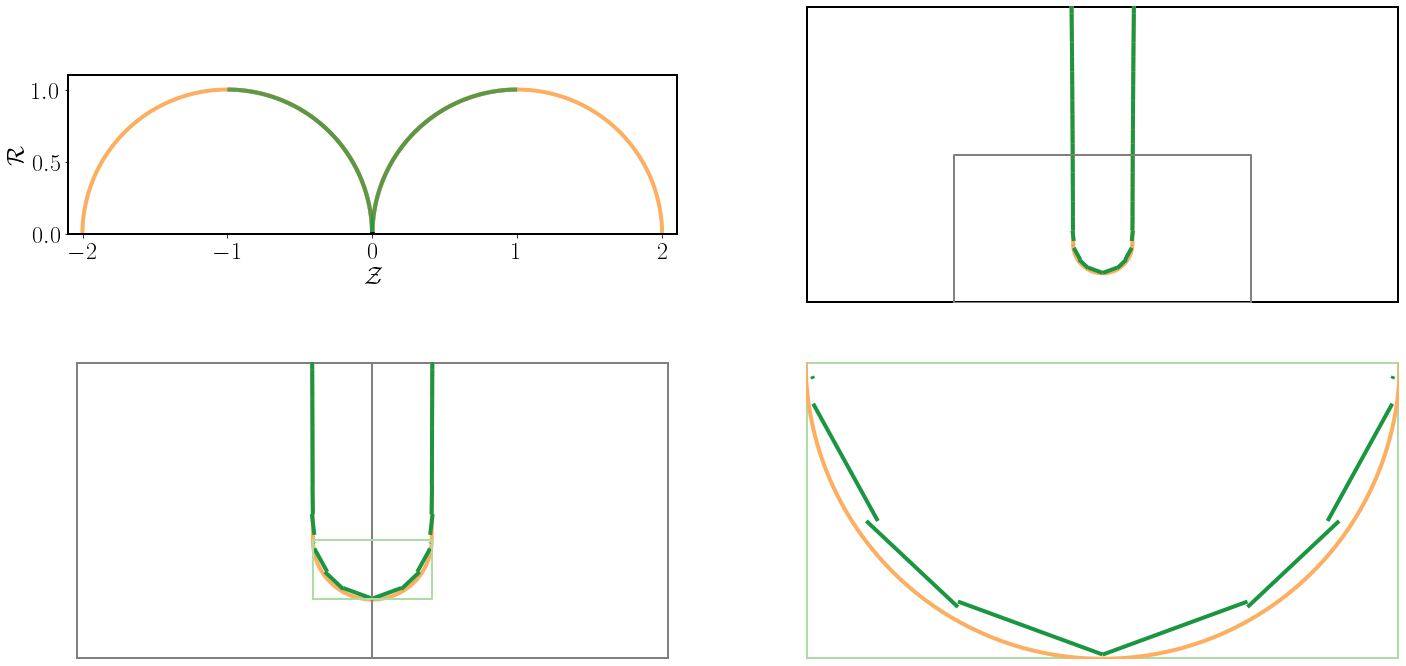

In [6]:
# delta is the smallest length scale -> Neck radius. 2*delta is sepration between the two drops/bubbles
# Rr is the radius ratio of the two drops/bubbles -- big to small.

delta = 1e-3
Rratio = [1]
ImageFolder='ImageFiles_delta1e-3'
DataFolder='DataFiles_delta1e-3'

# if ImageFolder is not present, create it
if not os.path.exists(ImageFolder):
  os.makedirs(ImageFolder)
# if DataFolder is not present, create it
if not os.path.exists(DataFolder):
  os.makedirs(DataFolder)


for Rr in Rratio:

  print("Doing Rr = ", Rr, " delta = ", delta, "\n")

  Interface, X1, Y1, Xf, Yf, X2, Y2 = GetCircles(delta, Rr)

  # Plot the two circles in raw form
  ImageName = str(ImageFolder)+'/TestWithBasiliskWithoutBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfaces(Interface, X1, Y1, Xf, Yf, X2, Y2, delta, ImageName, PLOT=True)

  # Save Interface in a data file withouth header
  Interface.to_csv('f_Testing.dat', index=False, header=False, sep=' ')
  
  FileDat = "InitialConditionRr-%3.2fdelta-%3.2f.dat" % (Rr, delta)
  FileName = str(DataFolder)+'/'+FileDat

  Interface.to_csv(FileName, index=False, header=False, sep=' ')
  # print(Interface.head())

  # get facets from Basilisk
  facets = gettingFacets(2)

  # compare the two interfaces -> from Basilisk and raw!
  ImageName = str(ImageFolder)+'/TestWithBasilisk_Rr'+str(Rr)+'.pdf'
  PlotInterfacesBas(Interface, facets, delta, ImageName, PLOT=True)